<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%2013/Loading_and_preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Preprocessing Data with Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Dataset Preparation with tf.data

In [2]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)

for item in dataset:
    print(item)


tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


Transformasi: Map, Batch, Repeat

In [3]:
dataset = dataset.map(lambda x: x * 2)
dataset = dataset.batch(3).repeat(2)

for batch in dataset:
    print(batch.numpy())


[0 2 4]
[ 6  8 10]
[12 14 16]
[18]
[0 2 4]
[ 6  8 10]
[12 14 16]
[18]


Prefetching for Performance

In [4]:
dataset = dataset.prefetch(1)


Visualisasi dan Normalisasi Gambar (Fashion MNIST)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


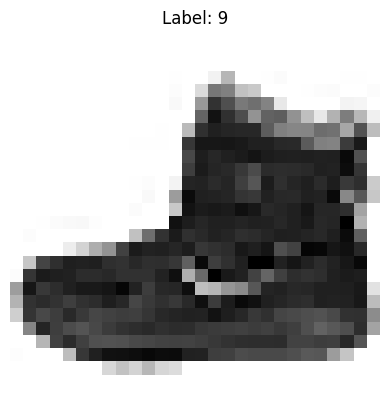

In [5]:
(X_train, y_train), _ = keras.datasets.fashion_mnist.load_data()

plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.title(f"Label: {y_train[0]}")
plt.show()

X_train = X_train.astype("float32") / 255.0


Preprocessing Function with map

In [6]:
def preprocess(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_set = train_set.shuffle(1000).map(preprocess).batch(32).prefetch(1)


Model Training

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(train_set, epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5514 - loss: 1.5433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7563 - loss: 0.6902
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7854 - loss: 0.5948
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8071 - loss: 0.5450
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8190 - loss: 0.5134
